In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [8]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

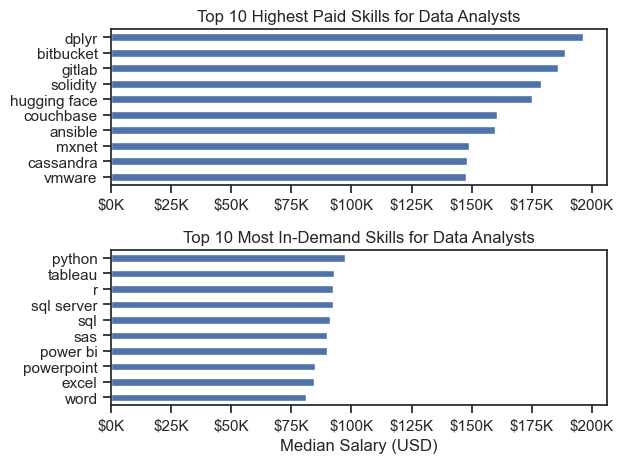

In [10]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

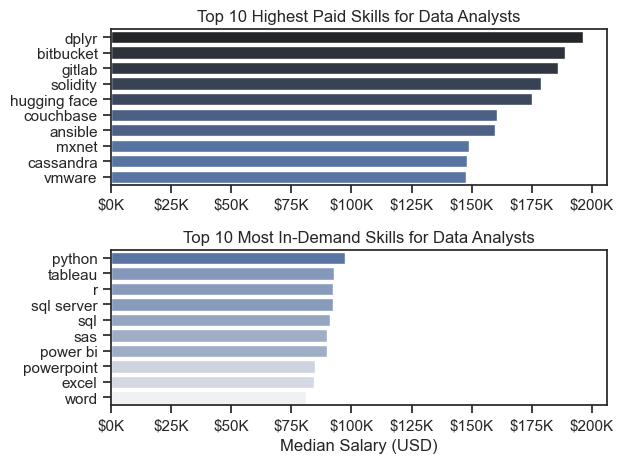

In [11]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

# Histogram

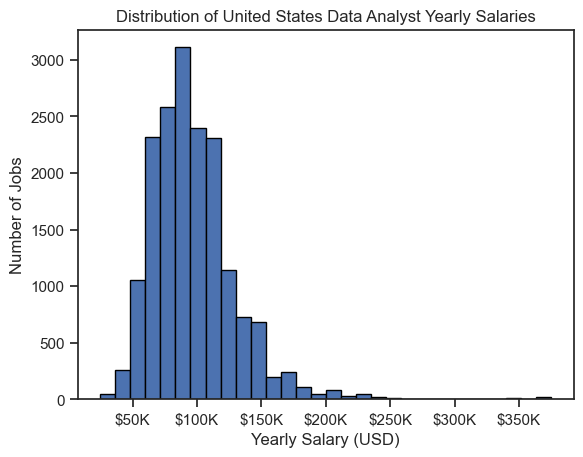

In [12]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

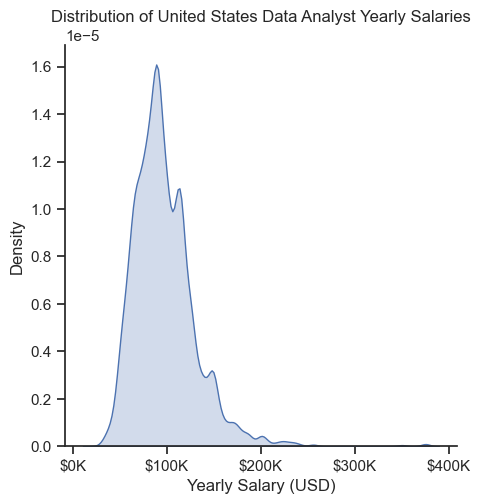

In [13]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True, common_norm=False)

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Boxplot

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

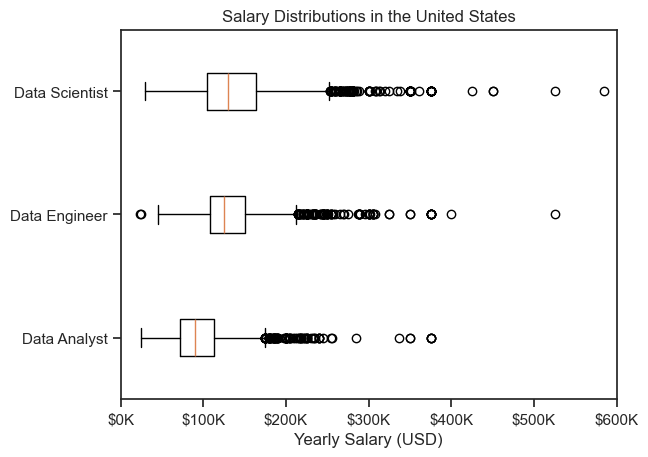

In [17]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

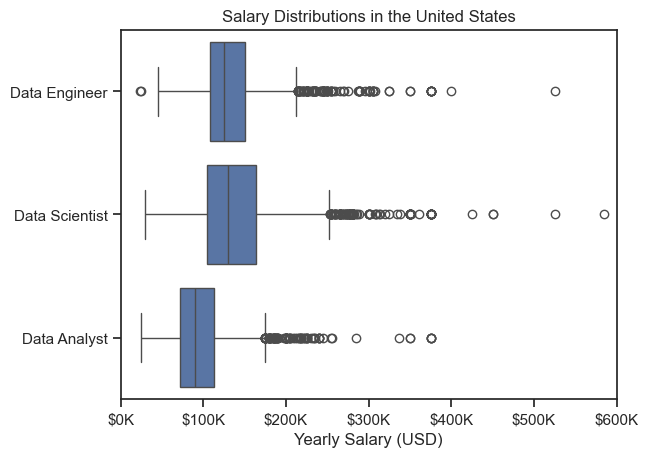

In [16]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()